<a href="https://colab.research.google.com/github/cathemesquita/Colab_notebooks/blob/main/Analise_CCM497_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install open-ephys-python-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.6/380.6 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from open_ephys.analysis import Session

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy as sp
from scipy import signal
import math
from scipy.signal import welch, spectrogram, coherence, find_peaks, firwin, lfilter, filtfilt, hilbert
import seaborn as sn
import scipy.signal as sig

import math
import time as ttime
from numpy.fft import fft, ifft, rfft, fftfreq
from scipy.signal import firwin, lfilter, filtfilt
from scipy.io import loadmat


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = '/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 2 - Screening 16 12 22/Screening/CCM497'
session = Session(dir)

In [ ]:
# Extraindo os dados da Open Ephys
rn = session.recordnodes[0].recordings[0] #selecionando o record node desejado

t_raw= rn.continuous[0].timestamps

# Ajustando o vetor de timestamps para iniciar em zero e ter o mesmo tamanho do dado
t = t_raw-t_raw[0]

# Para escolher o tamanho da amostra selecionar o início e o final desejados
fs = 1000
start_sample = 0 # início do sinal
end_sample = len(t) # fim do sinal

# Variáveis de tempo para recorte dos episódios de interesse
tempo_pre_CS = 2 # tempo em segundos antes do CS
tempo_pos_CS = 2 # tempo em segundos depois do CS
tempo_pos_US = 4 # tempo em segundos depois do US

# Criação do dicionario contendo os caminhos
recording_folder = '/content/drive/MyDrive/Registros desamparo open ephys/Experimento Ephys/Dia 2 - Screening 16 12 22/Screening/'
ratos = {'CCM497': recording_folder+'CCM497',
         'CCM559': recording_folder+'CCM559'}

data = rn.continuous[0].get_samples(start_sample_index=start_sample, end_sample_index=end_sample)

# DataFrame

| Rato | Tipo | Espectro | Evento | Banda | Canal |
| --- | --- | --- | --- | --- | --- |
| rato01 | screening | 3.7 | pré-CS | delta | Gr |
| rato01 | screening | 3.4 | pré-CS | delta | VA |
| rato01 | screening | 2.0 | pré-CS | theta | Hpc |


# Algoritmo

```
foreach rato: (dict rato)
    session <- screening (Tipo)
    arquivo <- le_arquivo (a linha do data...)
    sinal <- filtra(sinal inteiro, fazer um for para pegar todos os ch
    foreach region:
        foreach event:
            espectro <- calcula o espectro (sinal[evento_inicio:evento_fim] )
            foreach banda:
                espectro_medio <- calcula_media(espectro, banda)
                rat.append(rato)
                tipo.append(screening)
                espectro.append(espectro_medio)
                evento.append(evento)
                banda.append(banda)
                canal.append(region)

resultados = pd.DataFrame()
resultados['ratos'] = rat
resultados['canal'] = canal
```

> # Canais de interesse CCM497: 1-4 que estão no tetrodo 8(dv5, IL) e 5-8 que estão no tetrodo 7(dv5, IL)
* a posição desses canais foi confirmada através de histologia

In [ ]:
lista_sinais_filt60 = []
espectros_raw = []
filt = []
window = signal.windows.hamming(1000)




#variáveis que irão armazenar as faixas de freq
s_delta = []
s_theta = []
s_alpha_beta = []
s_lowgamma = []
s_highgamma = []

#filtros das faixas de freq
# filt_delta = firwin(101, [0.5,4], pass_zero='bandpass', window='hamming',  fs=1000)
# filt_theta = firwin(101, [4,8], pass_zero='bandpass', window='hamming',  fs=1000)
# filt_alpha_beta = firwin(101, [8,30], pass_zero='bandpass', window='hamming',  fs=1000)
# filt_lowgamma = firwin(101, [30,50], pass_zero='bandpass', window='hamming',  fs=1000)
# filt_highgamma = firwin(101, [80,500], pass_zero='bandpass', window='hamming',  fs=1000)


# ARMAZENANDO OS SINAIS EM UMA LISTA
lista_sinais = []
for i in range(32):
  lista_sinais.append(data[:,[i]])

#Canais de interesse: 1-4 que estão no tetrodo 8(dv5, IL) e 5-8 que estão no tetrodo 7(dv5, IL)
# ch1 = lista_sinais_raw[0] está muito ruidoso, não vou usar!
# ch2 = lista_sinais[1] # sinal top
# ch3 = lista_sinais[2] #sinal top
# ch4 = lista_sinais[3] #sinal top
# ch5 = lista_sinais[4]
# ch6 = lista_sinais[5]
# ch7 = lista_sinais[6] # parece estar mais ruidoso que o 5 e 6!
# ch8 = lista_sinais[7] #sinal top





In [ ]:
# definir as frequências de corte do filtro
fc_low = 59
fc_high = 61

# definir a ordem do filtro
order = 5
# projetar o filtro Butterworth
b, a = signal.butter(order, [fc_low/(0.5*1000), fc_high/(0.5*1000)], btype='bandstop')


# FILTRANDO 60Hz E SEUS HARMÔNICOS
lista_filt1 = []
lista_filt2 = []

#Filtrar 60Hz
for n in range(32):
  x = lista_sinais[n]
  xf = signal.filtfilt(b, a, x.transpose())
  lista_filt1.append(xf[0])

# Define the filter parameters
fc = 90  # Cutoff frequency in Hz
fs = 1000
order = 5  # Filter order

# Create the filter coefficients
d, c = signal.butter(order, fc / (fs / 2), 'lowpass')

# filtrar >120hz
for l in range(32):
  x_low = lista_filt1[l]
  xf_low = signal.filtfilt(d, c, x_low)
  lista_filt2.append(xf_low)


In [ ]:
len(lista_filt2[2])

914700

(0.0, 350.0)

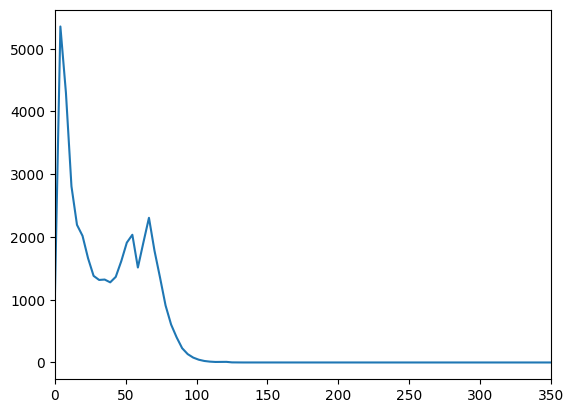

In [ ]:
f, p = welch(lista_filt2[2], fs=1000)
plt.plot(f, p.transpose())
plt.xlim(0,350)

> # CS CUT

In [ ]:
# Listar todos os eventos (digital input)
# Neste caso, a coluna line com valores 2 é refente ao CS, a coluna line com valores 1 é refente ao US
event = rn.events


# Listando todos os momentos em que a luz acendeu
CS = event[(event['line'] ==2)&(event['state']==1)]


In [ ]:
#cortando o dado: 2s antes e 2s depois do CS


lista_CS = []
CS_samplenumber = list((CS['sample_number']-t_raw[0]*1000).astype(int))

i = 0
f = 0


for c in range(len(lista_filt2)):
  CS_cut = []
  for sn in CS_samplenumber:
    i = sn-2000
    f = sn+2000
    cut = np.array(lista_filt2[c][i:f])
    CS_cut.append(cut)
  lista_CS.append(CS_cut)


>  ANÁLISE TETRODOS 7 E 8 (IL)
* CANAIS SELECIONADOS PARA ANÁLISE:  
  * TETRODO7: CH3
  * TETRODO8: CH8

  esses canais foram escolhidos para representar cada tetrodo pois o sinal deles está muito bom!

> # TETRODO7: CH3

(0.0, 120.0)

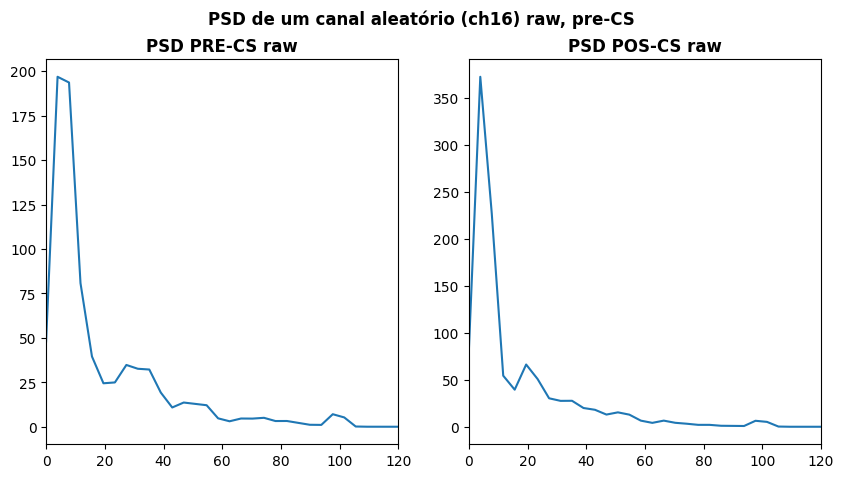

In [ ]:
f, p = welch(lista_CS[2][15][0:2000], fs=1000)
f2, p2 = welch(lista_CS[2][15][2000:4000], fs=1000)

figura = plt.figure(figsize=(10,5))
figura.suptitle('PSD de um canal aleatório (ch16) raw, pre-CS', fontweight ="bold")

figura.add_subplot(121)
plt.plot(f, p.transpose())
plt.title('PSD PRE-CS raw', fontweight ="bold")
plt.xlim(0,120)

figura.add_subplot(122)
plt.plot(f2, p2.transpose())
plt.title('PSD POS-CS raw', fontweight ="bold")
plt.xlim(0,120)


(0.0, 30.0)

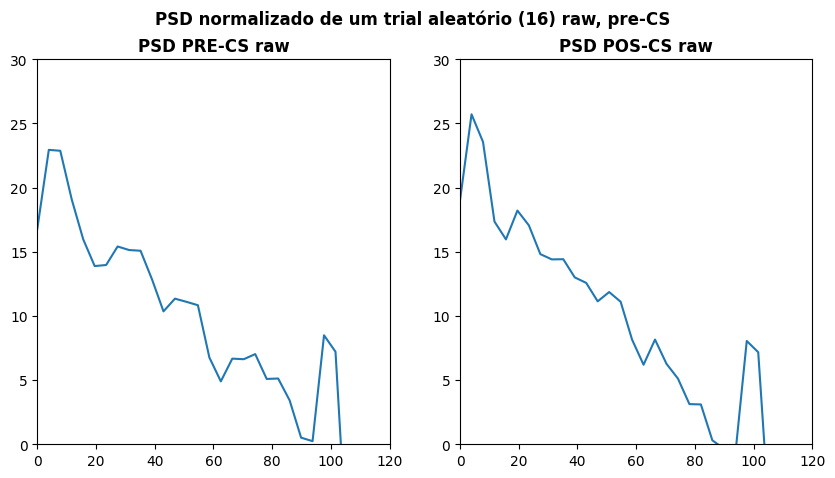

In [ ]:
f, p = welch(lista_CS[2][15][0:2000], fs=1000)
f2, p2 = welch(lista_CS[2][15][2000:4000], fs=1000)

figura = plt.figure(figsize=(10,5))
figura.suptitle('PSD normalizado de um trial aleatório (16) raw, pre-CS', fontweight ="bold")

figura.add_subplot(121)
plt.plot(f, 10*np.log10(p.transpose()))
plt.title('PSD PRE-CS raw', fontweight ="bold")
plt.xlim(0,120)
plt.ylim(0,30)
figura.add_subplot(122)
plt.plot(f2, 10*np.log10(p2.transpose()))
plt.title('PSD POS-CS raw', fontweight ="bold")
plt.xlim(0,120)
plt.ylim(0,30)

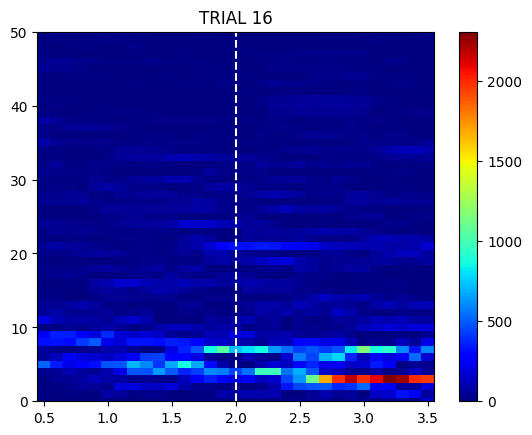

In [ ]:
sx = lista_CS[2][15]
f, t, Sxx = spectrogram(sx, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
plt.pcolormesh(t, f, Sxx, cmap='jet')
plt.ylim(0,50)
plt.title( 'TRIAL 16')
plt.axvline(x=2.0, color = 'white', linestyle = '--')
plt.colorbar()

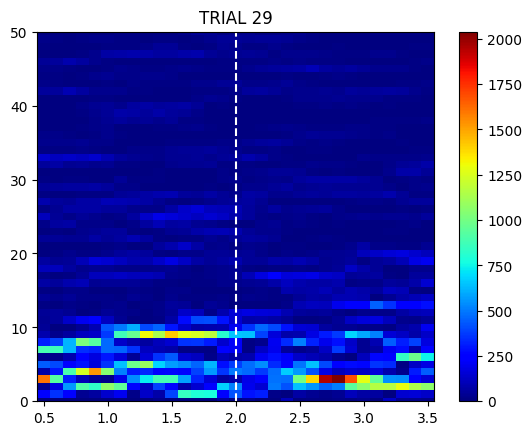

In [ ]:
s1 = lista_CS[2][28]
f, t, Sxx = spectrogram( s1, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
plt.pcolormesh(t, f, Sxx, cmap='jet')
plt.ylim(0,50)
plt.title( 'TRIAL 29')
plt.axvline(x=2.0, color = 'white', linestyle = '--')
plt.colorbar()



In [ ]:
# FILTRANDO DELTA E THETA PARA FAZER O PSD MÉDIO DOS 30 TRIALS
window = signal.windows.hamming(1000)
filt_theta = firwin(300, [4,8], pass_zero='bandpass', window='hamming',  fs=1000)

media_theta_alltrials = (np.sum(lista_CS[2], axis=0))/30
theta = filtfilt(filt_theta, 1, media_theta_alltrials)

theta_pre = theta[0:2000]
theta_pos = theta[2000:4000]


f_pre, p_pre = welch(theta_pre, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
sdmn_pre = sp.stats.sem(p_pre)


f_pos, p_pos = welch(theta_pos, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
sdmn_pos = sp.stats.sem(p_pos)

Text(0, 0.5, 'Power')

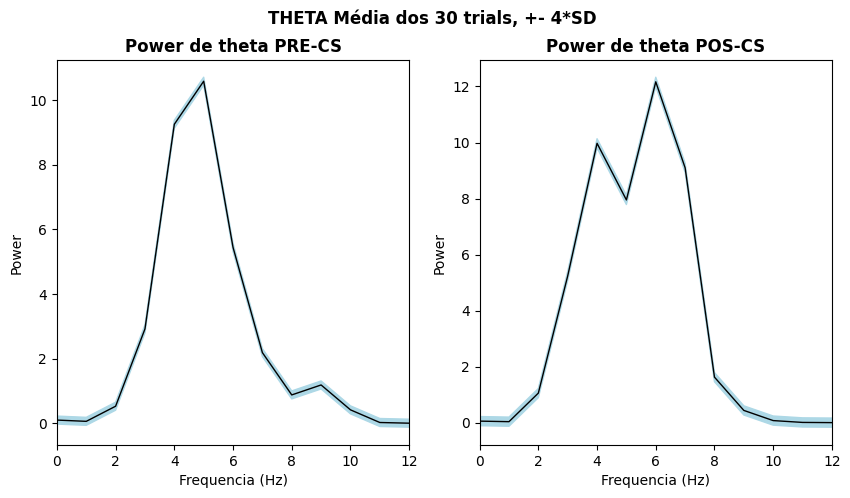

In [ ]:
figura = plt.figure(figsize=(10,5))
figura.suptitle('THETA Média dos 30 trials, +- 4*SD', fontweight ="bold")

figura.add_subplot(121)
plt.plot(f_pre,p_pre.transpose(), linewidth=1, color='k')
plt.fill_between(f_pre,p_pre.transpose(),  p_pre.transpose() + 4*sdmn_pre, color = 'lightblue')
plt.fill_between(f_pre,p_pre.transpose(),  p_pre.transpose() - 4*sdmn_pre, color = 'lightblue' )
plt.title('Power de theta PRE-CS',fontweight ="bold")
plt.xlim(0,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

figura.add_subplot(122)
plt.plot(f_pos,p_pos.transpose(), linewidth=1, color='k')
plt.fill_between(f_pos,p_pos.transpose(),  p_pos.transpose() + 4*sdmn_pos , color = 'lightblue')
plt.fill_between(f_pos,p_pos.transpose(),  p_pos.transpose() - 4*sdmn_pos, color = 'lightblue' )
plt.title('Power de theta POS-CS', fontweight ="bold")
plt.xlim(0,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')


In [ ]:
filt_delta = firwin(300, [0.1,4], pass_zero='bandpass', window='hamming',  fs=1000)

media_delta_alltrials = (np.sum(lista_CS[2], axis=0))/30
delta = filtfilt(filt_delta, 1, media_delta_alltrials)

delta_pre = delta[0:2000]
delta_pos = delta[2000:4000]

fd_pre, pd_pre = welch(delta_pre, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
sdmn_dpre = sp.stats.sem(pd_pre)

fd_pos, pd_pos = welch(delta_pos, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
sdmn_dpos = sp.stats.sem(pd_pos)

Text(0, 0.5, 'Power')

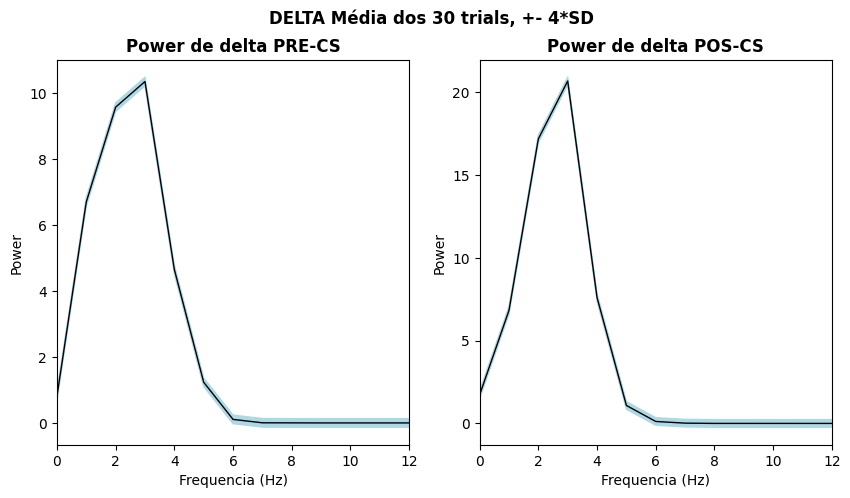

In [ ]:
figura = plt.figure(figsize=(10,5))
figura.suptitle('DELTA Média dos 30 trials, +- 4*SD', fontweight ="bold")

figura.add_subplot(121)
plt.plot(fd_pre,pd_pre.transpose(), linewidth=1, color='k')
plt.fill_between(fd_pre,pd_pre.transpose(),  pd_pre.transpose() + 4*sdmn_dpre, color = 'lightblue')
plt.fill_between(fd_pre,pd_pre.transpose(),  pd_pre.transpose() - 4*sdmn_dpre, color = 'lightblue' )
plt.title('Power de delta PRE-CS',fontweight ="bold")
plt.xlim(0,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

figura.add_subplot(122)
plt.plot(fd_pos,pd_pos.transpose(), linewidth=1, color='k')
plt.fill_between(fd_pos,pd_pos.transpose(),  pd_pos.transpose() + 4*sdmn_dpos , color = 'lightblue')
plt.fill_between(fd_pos,pd_pos.transpose(),  pd_pos.transpose() - 4*sdmn_dpos, color = 'lightblue' )
plt.title('Power de delta POS-CS', fontweight ="bold")
plt.xlim(0,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

* fazendo o PSD do trial 29, ele teve um espectrograma interessante

In [ ]:
theta = filtfilt(filt_theta, 1, lista_CS[2][28])

theta_pre = theta[0:2000]
theta_pos = theta[2000:4000]


f_pre, p_pre = welch(theta_pre, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
sdmn_pre = sp.stats.sem(p_pre)


f_pos, p_pos = welch(theta_pos, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
sdmn_pos = sp.stats.sem(p_pos)


Text(0, 0.5, 'Power')

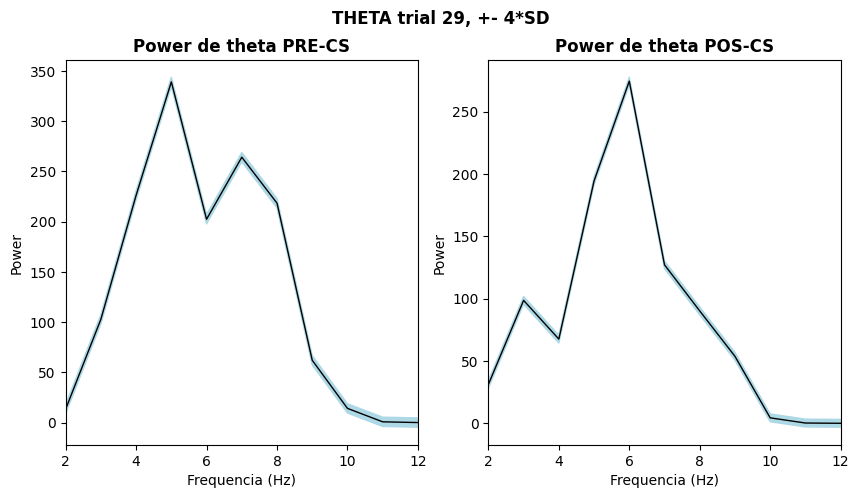

In [ ]:
figura = plt.figure(figsize=(10,5))
figura.suptitle('THETA trial 29, +- 4*SD', fontweight ="bold")

figura.add_subplot(121)
plt.plot(f_pre,p_pre.transpose(), linewidth=1, color='k')
plt.fill_between(f_pre,p_pre.transpose(),  p_pre.transpose() + 4*sdmn_pre, color = 'lightblue')
plt.fill_between(f_pre,p_pre.transpose(),  p_pre.transpose() - 4*sdmn_pre, color = 'lightblue' )
plt.title('Power de theta PRE-CS',fontweight ="bold")
plt.xlim(2,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

figura.add_subplot(122)
plt.plot(f_pos,p_pos.transpose(), linewidth=1, color='k')
plt.fill_between(f_pos,p_pos.transpose(),  p_pos.transpose() + 4*sdmn_pos , color = 'lightblue')
plt.fill_between(f_pos,p_pos.transpose(),  p_pos.transpose() - 4*sdmn_pos, color = 'lightblue' )
plt.title('Power de theta POS-CS', fontweight ="bold")
plt.xlim(2,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')


* estou achando estranho pq o espectrograma não está mostrando esse power todo em 6HZ! ?????????

In [ ]:
filt_delta = firwin(300, [0.1,4], pass_zero='bandpass', window='hamming',  fs=1000)


delta = filtfilt(filt_delta, 1, lista_CS[2][28] )

delta_pre = delta[0:2000]
delta_pos = delta[2000:4000]

fd_pre, pd_pre = welch(delta_pre, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
sdmn_dpre = sp.stats.sem(pd_pre)

fd_pos, pd_pos = welch(delta_pos, fs=1000, nperseg=1000, noverlap=int(0.9*1000))
sdmn_dpos = sp.stats.sem(pd_pos)

Text(0, 0.5, 'Power')

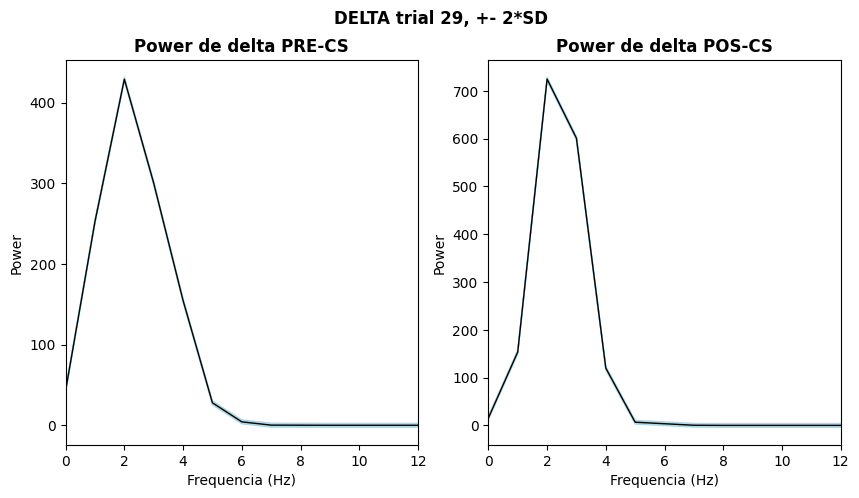

In [ ]:
figura = plt.figure(figsize=(10,5))
figura.suptitle('DELTA trial 29, +- 2*SD', fontweight ="bold")

figura.add_subplot(121)
plt.plot(fd_pre,pd_pre.transpose(), linewidth=1, color='k')
plt.fill_between(fd_pre,pd_pre.transpose(),  pd_pre.transpose() + 2*sdmn_dpre, color = 'lightblue')
plt.fill_between(fd_pre,pd_pre.transpose(),  pd_pre.transpose() - 2*sdmn_dpre, color = 'lightblue' )
plt.title('Power de delta PRE-CS',fontweight ="bold")
plt.xlim(0,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

figura.add_subplot(122)
plt.plot(fd_pos,pd_pos.transpose(), linewidth=1, color='k')
plt.fill_between(fd_pos,pd_pos.transpose(),  pd_pos.transpose() + 2*sdmn_dpos , color = 'lightblue')
plt.fill_between(fd_pos,pd_pos.transpose(),  pd_pos.transpose() - 2*sdmn_dpos, color = 'lightblue' )
plt.title('Power de delta POS-CS', fontweight ="bold")
plt.xlim(0,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

Text(0, 0.5, 'Power')

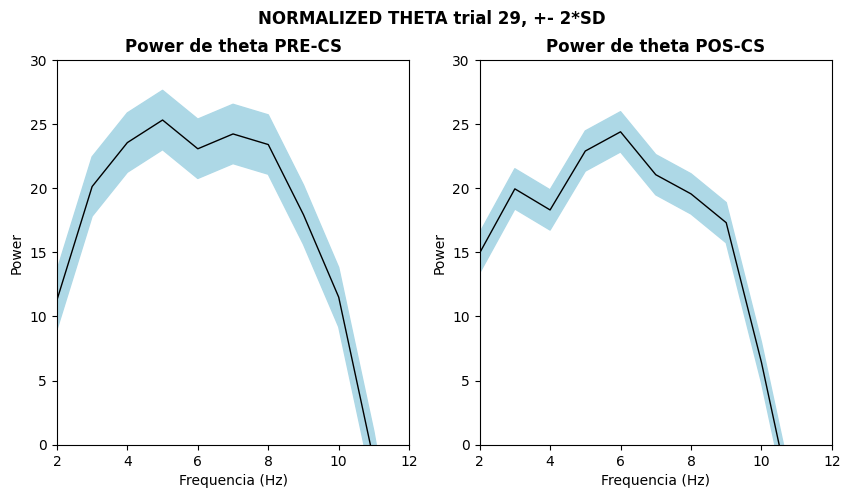

In [ ]:
figura = plt.figure(figsize=(10,5))
figura.suptitle('NORMALIZED THETA trial 29, +- 2*SD', fontweight ="bold")

figura.add_subplot(121)
plt.plot(f_pre,10*np.log10(p_pre.transpose()), linewidth=1, color='k')
plt.fill_between(f_pre,10*np.log10(p_pre.transpose()),  10*np.log10(p_pre.transpose()) + 2*sdmn_pre, color = 'lightblue')
plt.fill_between(f_pre,10*np.log10(p_pre.transpose()),  10*np.log10(p_pre.transpose()) - 2*sdmn_pre, color = 'lightblue' )
plt.title('Power de theta PRE-CS',fontweight ="bold")
plt.ylim(0,30)
plt.xlim(2,12)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

figura.add_subplot(122)
plt.plot(f_pos,10*np.log10(p_pos.transpose()), linewidth=1, color='k')
plt.fill_between(f_pos,10*np.log10(p_pos.transpose()), 10*np.log10(p_pos.transpose())+ 2*sdmn_pos , color = 'lightblue')
plt.fill_between(f_pos,10*np.log10(p_pos.transpose()), 10*np.log10(p_pos.transpose()) - 2*sdmn_pos, color = 'lightblue' )
plt.title('Power de theta POS-CS', fontweight ="bold")
plt.xlim(2,12)
plt.ylim(0,30)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

Text(0, 0.5, 'Power')

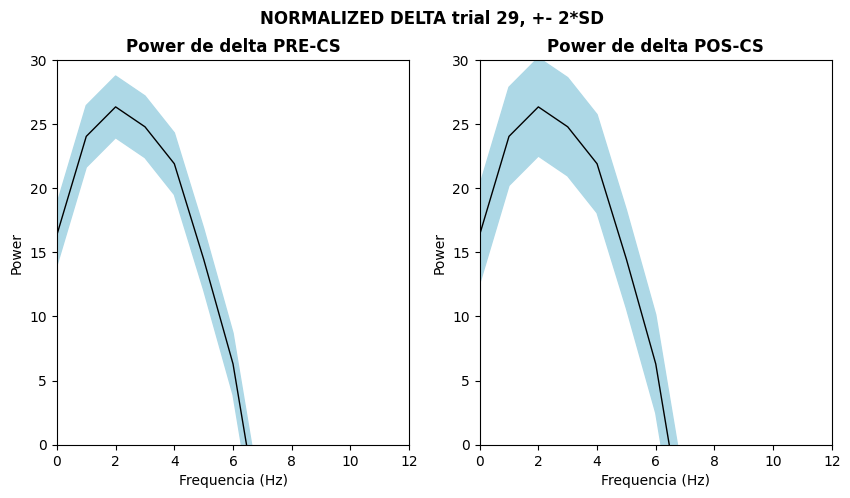

In [ ]:
figura = plt.figure(figsize=(10,5))
figura.suptitle('NORMALIZED DELTA trial 29, +- 2*SD', fontweight ="bold")

figura.add_subplot(121)
plt.plot(fd_pre,10*np.log10(pd_pre.transpose()), linewidth=1, color='k')
plt.fill_between(fd_pre,10*np.log10(pd_pre.transpose()), 10*np.log10(pd_pre.transpose()) + 2*sdmn_dpre, color = 'lightblue')
plt.fill_between(fd_pre,10*np.log10(pd_pre.transpose()), 10*np.log10(pd_pre.transpose()) - 2*sdmn_dpre, color = 'lightblue' )
plt.title('Power de delta PRE-CS',fontweight ="bold")
plt.xlim(0,12)
plt.ylim(0,30)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

figura.add_subplot(122)
plt.plot(fd_pos,10*np.log10(pd_pre.transpose()), linewidth=1, color='k')
plt.fill_between(fd_pos,10*np.log10(pd_pre.transpose()), 10*np.log10(pd_pre.transpose()) + 2*sdmn_dpos , color = 'lightblue')
plt.fill_between(fd_pos,10*np.log10(pd_pre.transpose()), 10*np.log10(pd_pre.transpose()) - 2*sdmn_dpos, color = 'lightblue' )
plt.title('Power de delta POS-CS', fontweight ="bold")
plt.xlim(0,12)
plt.ylim(0,30)
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Power')

* AO NORMALIZAR, O DELTA PARECE ESTAR MUITO PARECIDO, NÃO ENTENDI ISSO TB!!!





> # US CUT

In [ ]:
lista_sinais = []
for i in range(32):
  lista_sinais.append(data[:,[i]])


#lista do valor máximo de cada canal

lista_mean_abs = []
for i in range(32):
  lista_mean_abs.append(np.max(np.abs(data[:,[i]])))

#definindo o threshold
threshold = (np.max(lista_mean_abs))/5


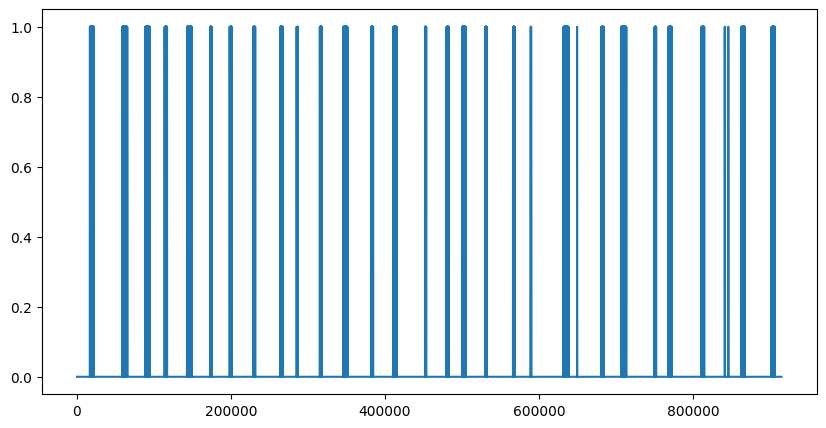

In [ ]:
shockTimestamp = np.zeros(914700)

idx_shock = np.array(lista_sinais[2][:])>=threshold
shockTimestamp[idx_shock[:,0]] = 1

plt.figure(figsize=(10,5))
plt.plot(shockTimestamp)
# plt.xlim(20000,22000)


In [ ]:
US=[]
choque=0
registrando = 0
for i in range(0,len(shockTimestamp)):
  if (shockTimestamp[i]==0) and (shockTimestamp[i-1]==1):
    if(i+10000) < 913700:
      msmbarra = False
      for j in range(i,i+10000):
        if(shockTimestamp[j]==1):
          msmbarra=True #Checou que ainda está dentro de um choque, então vai pular para os próximos valores em que i=0 e i-1= 1
          break
      if msmbarra == False: #Como os 10 mil pontos após o "suposto" fim de choque são iguais a zero, estamos no fim de um choque(fim da barra)
        choque=choque+1
        para_registrar=[]
        for k in range(i,i+12000): #Registrando os próximos 12 mil valores após o fim do choque(inclui ruídos)
          para_registrar.append(lista_sinais[2][k])
        intervalos.append(para_registrar)
    else:
      msmbarra = False
      for j in range(i,i+5000): #Checou que ainda está dentro de um choque, então vai pular para os próximos valores em que i=0 e i-1= 1
        if(shockTimestamp[j]==1):
          msmbarra=True #Como os 5 mil pontos após o "suposto" fim de choque são iguais a zero, estamos no fim de um choque(fim da barra)
          break
      if msmbarra == False:
          choque=choque+1
          para_registrar=[]
          for k in range(i,i+8500): #Registrando os próximos 8500 valores após o fim do choque(inclui ruídos), o valor é menor do que o acima para não extravazar a lista.
            para_registrar.append(lista_sinais[2][k])
          US.append(para_registrar)

NameError: ignored

In [ ]:
len(intervalos)

In [ ]:
for i in range(30):
  plt.figure()
  plt.plot(intervalos[i])

In [ ]:
shock = np.zeros(914700)

absoluto = pd.DataFrame(np.abs(lista_sinais[2]))
analytic_signal = hilbert(absoluto)
envelope = np.abs(analytic_signal)








#idx_shock = np.array(absoluto[:])>=threshold
#shock[idx_shock[:,0]] = 1



plt.figure(figsize = (15,10))
plt.plot(envelope)


In [ ]:
dif = np.diff(moving_avg[0:50000].transpose())
dif

In [ ]:
plt.plot(dif)

In [ ]:
window_size = 1000
moving_avg = absoluto.rolling(window_size, center=True).mean()

dif = np.diff(moving_avg[501:50000])

fig, ax = plt.subplots()
ax.plot(absoluto[0:2000], label='signal')
ax.plot(moving_avg[0:2000], label='moving average')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.legend()
plt.show()

plt.figure()
plt.plot(dif, label='moving average diff', color='k')




